In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('surveyResponses.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 14 columns):
 #   Column                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                   --------------  -----  
 0   Timestamp                                                                                                376 non-null    object 
 1   University Program Faculty?                                                                              371 non-null    object 
 2   Which residence did you stay at?                                                                         373 non-null    object 
 3   What rating would you give the residence you lived at, based on your experience? (Worst: 1, Best: 10).   372 non-null    float64
 4   I see myself as extraverted and enthusiastic                                          

In [3]:
#get num empty results in columns
data.isna().sum()

Timestamp                                                                                                  0
University Program Faculty?                                                                                5
Which residence did you stay at?                                                                           3
What rating would you give the residence you lived at, based on your experience? (Worst: 1, Best: 10).     4
I see myself as extraverted and enthusiastic                                                               2
I see myself as critical and quarrelsome.                                                                  2
I see myself as dependable and self-disciplined.                                                           4
I see myself as anxious and easily upset                                                                   2
I see myself as open to new experiences.                                                                   5
I see myself as res

In [4]:
#With some empty results we need to remove them from our data set so we need to retrieve the rows that are empty
flt = data.isna().any(axis=1)
data[flt]


,Timestamp,University Program Faculty?,Which residence did you stay at?,"What rating would you give the residence you lived at, based on your experience? (Worst: 1, Best: 10).",I see myself as extraverted and enthusiastic,I see myself as critical and quarrelsome.,I see myself as dependable and self-disciplined.,I see myself as anxious and easily upset,I see myself as open to new experiences.,I see myself as reserved and quiet.,I see myself as sympathetic and warm.,I see myself as disorganized and careless.,I see myself as calm and emotionally stable.,I see myself as conventional and uncreative.
25,12/02/2024 15:42:42,Engineering,im a rare offcampus first year who commuted in...,NaN,3.0,3.0,6.0,6.0,4.0,5.0,6.0,5.0,5.0,4.0
46,12/02/2024 17:23:51,Engineering,UW Place (UWP),6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,12/02/2024 17:40:07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,12/02/2024 21:15:35,Mathematics,UW Place (UWP),8.0,2.0,4.0,5.0,2.0,7.0,NaN,5.0,4.0,4.0,2.0
98,13/02/2024 02:45:27,Mathematics,UW Place (UWP),7.0,4.0,5.0,6.0,2.0,6.0,5.0,7.0,NaN,5.0,3.0
139,14/03/2024 13:33:41,Environment,Village 1,4.0,3.0,5.0,4.0,4.0,2.0,3.0,5.0,3.0,NaN,5.0
144,14/03/2024 13:35:23,Science,NaN,4.0,3.0,6.0,4.0,4.0,2.0,5.0,3.0,4.0,4.0,6.0
150,14/03/2024 13:36:47,Environment,Village 1,2.0,2.0,5.0,4.0,4.0,NaN,3.0,6.0,3.0,4.0,4.0
165,14/03/2024 13:42:40,Mathematics,NaN,4.0,2.0,5.0,4.0,4.0,3.0,6.0,3.0,4.0,4.0,6.0
207,14/03/2024 14:00:42,Mathematics,Ron Eydt Village (REV),NaN,7.0,1.0,NaN,3.0,4.0,6.0,2.0,6.0,5.0,4.0


In [5]:
#Drop the above rows
data.dropna(how='any', inplace=True)

In [6]:
#just double check that there are now no emptty rows
flt = data.isna().any(axis=1)
data[flt]


,Timestamp,University Program Faculty?,Which residence did you stay at?,"What rating would you give the residence you lived at, based on your experience? (Worst: 1, Best: 10).",I see myself as extraverted and enthusiastic,I see myself as critical and quarrelsome.,I see myself as dependable and self-disciplined.,I see myself as anxious and easily upset,I see myself as open to new experiences.,I see myself as reserved and quiet.,I see myself as sympathetic and warm.,I see myself as disorganized and careless.,I see myself as calm and emotionally stable.,I see myself as conventional and uncreative.


In [7]:
#drop timeStamp column
data = data.drop('Timestamp', axis=1)

In [8]:
#rename our columns
data = data.rename(columns=
               {'University Program Faculty?': 'program', 
                'Which residence did you stay at?': 'residence',
                'What rating would you give the residence you lived at, based on your experience? (Worst: 1, Best: 10). ': 'rating',
                'I see myself as extraverted and enthusiastic': 'extravertedScore',
                'I see myself as critical and quarrelsome.': 'criticalScore',
                'I see myself as dependable and self-disciplined.': 'dependableScore',
                'I see myself as anxious and easily upset': 'anxiousScore',
                'I see myself as open to new experiences.': 'openScore',
                'I see myself as reserved and quiet.': 'reservedScore',
                'I see myself as sympathetic and warm.': 'sympathyScore',
                'I see myself as disorganized and careless.': 'carelessScore',
                'I see myself as calm and emotionally stable.': 'calmScore',
                'I see myself as conventional and uncreative.': 'creativeScore'
               })

In [9]:
#we want to remove all values that are not from our predefined set of residences, for example if a student put "Off campus for the semester"
residenceList = ['Village 1', 'Ron Eydt Village (REV)', 'Claudette Millar Hall (CMH)', 'Mackenzie King Village (MKV)',
                 'UW Place (UWP)', 'Columbia Lake Village South (CLV-South)', 'Columbia Lake Village North (CLV-North)', 'Minota Hagey (MH)']
indexNames = data[~data['residence'].isin(residenceList)].index
data = data.drop(indexNames)

In [10]:
#convert categorical variable residence into values using nominal one hot encoding
dfOneHot = pd.get_dummies(data, columns=["residence"])
data = pd.concat([data['residence'], dfOneHot], axis=1)
data.head()

,residence,program,rating,extravertedScore,criticalScore,dependableScore,anxiousScore,openScore,reservedScore,sympathyScore,carelessScore,calmScore,creativeScore,residence_Claudette Millar Hall (CMH),residence_Columbia Lake Village South (CLV-South),residence_Mackenzie King Village (MKV),residence_Ron Eydt Village (REV),residence_UW Place (UWP),residence_Village 1
0,UW Place (UWP),Engineering,7.0,6.0,3.0,6.0,4.0,5.0,3.0,3.0,2.0,4.0,2.0,0,0,0,0,1,0
1,Ron Eydt Village (REV),Engineering,10.0,7.0,7.0,6.0,5.0,5.0,1.0,7.0,2.0,4.0,2.0,0,0,0,1,0,0
2,Ron Eydt Village (REV),Engineering,10.0,5.0,5.0,6.0,3.0,7.0,4.0,7.0,2.0,7.0,5.0,0,0,0,1,0,0
3,Ron Eydt Village (REV),Engineering,6.0,4.0,3.0,5.0,2.0,4.0,4.0,6.0,6.0,5.0,5.0,0,0,0,1,0,0
4,Village 1,Engineering,6.0,6.0,4.0,2.0,5.0,7.0,4.0,6.0,7.0,5.0,2.0,0,0,0,0,0,1


In [11]:
#Now we need to aggregate the data to process for the personality test attribution. According to the personality test we selected
#We must 1. Recode the reverse-scored items (i.e., recode a 7 with a 1, a 6 with a 2, a 5 with a 3, etc.). The reverse scored columns are 2, 4, 6, 8, & 10.
#2. Take the AVERAGE of the two items (the standard item and the recoded reverse-scored item) that make up each scale.

# 1. Reverse the specified columns
reverseColumnList = ['criticalScore', 'anxiousScore', 'reservedScore', 'carelessScore', 'creativeScore']

def reverseColumns(x):
    
    #converts a 7 into 1, 6 into 2, etc
    return 8 - x

reversedColumns = data[reverseColumnList].apply(reverseColumns)
data[reverseColumnList] = reversedColumns

#2. Take average for matching columns to get our five scores for each coresponding personality

personalityTraitSet = {
    'extraversion' : ['extravertedScore', 'reservedScore'],
    'agreeableness' : ['criticalScore', 'sympathyScore'],
    'conscientiousness': ['dependableScore', 'carelessScore'],
    'emotionalStability' : ['anxiousScore', 'calmScore'],
    'Openness' : ['openScore', 'creativeScore']
}



data['extraversion'] = (data['extravertedScore'] + data['reservedScore']) / 2
data['agreeableness'] = (data['criticalScore'] + data['sympathyScore']) / 2
data['conscientiousness'] = (data['dependableScore'] + data['carelessScore']) / 2
data['emotionalStability'] = (data['anxiousScore'] + data['calmScore']) / 2
data['Openness'] = (data['openScore'] + data['creativeScore']) / 2
data.drop(columns=['extravertedScore', 'reservedScore', 'criticalScore', 'sympathyScore', 'dependableScore', 'carelessScore', 'anxiousScore', 'calmScore', 'openScore', 'creativeScore'], inplace=True)

In [12]:
# Need to scale data to be between 1 and 0
'''
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scale_cols = ['extraversion', 'agreeableness', 'conscientiousness', 'emotionalStability', 'Openness']
# fit the scaler
scaler.fit(data[scale_cols])
data[scale_cols] = scaler.transform(data[scale_cols])
'''

"\nfrom sklearn.preprocessing import MinMaxScaler\nscaler = MinMaxScaler()\nscale_cols = ['extraversion', 'agreeableness', 'conscientiousness', 'emotionalStability', 'Openness']\n# fit the scaler\nscaler.fit(data[scale_cols])\ndata[scale_cols] = scaler.transform(data[scale_cols])\n"

In [13]:
#convert ratings ranged 1-10 into three categories of enjoyed, average, and dislike 
'''
def map_score_to_category(score):
    if score >= 7:
        return 'Enjoyed'
    elif score >= 4:
        return 'Average'
    else:
        return 'Did not enjoy'

# Apply the function to the 'class' column
data['rating'] = data['rating'].apply(map_score_to_category)
'''

"\ndef map_score_to_category(score):\n    if score >= 7:\n        return 'Enjoyed'\n    elif score >= 4:\n        return 'Average'\n    else:\n        return 'Did not enjoy'\n\n# Apply the function to the 'class' column\ndata['rating'] = data['rating'].apply(map_score_to_category)\n"

In [14]:
##this is too take out classes that barely have any data such as only 1 person ever putting 1 as their rating
class_counts = data['rating'].value_counts()
class_counts
valid_classes = class_counts[class_counts >= 2].index
data = data[data['rating'].isin(valid_classes)]

In [15]:
##with our dataset ready we now save it as a csv to use for other models
data.to_csv('parsedSurveyData.csv', sep=',', index=False, encoding='utf-8')


In [16]:
outcome = data['rating']
inputVariables = data[data.columns[3:]]

from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, random_state=0, 
stratify=data['rating'])

X_train = train[train.columns[3:]]
y_train = train['rating']

X_test = test[test.columns[3:]]
y_test = test['rating']



In [17]:
from sklearn.linear_model import LogisticRegression 

model_residence = LogisticRegression(multi_class='ovr', solver='liblinear')
model_residence.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [18]:
print('Coefficients of the model for all features:', model_residence.coef_)

Coefficients of the model for all features: [[ 0.12131838 -0.01530118  0.84986809 -0.37011824  0.27557247 -0.05750922
   0.24239198 -0.51718045 -0.17313668 -0.45869082 -0.10752366]
 [ 0.30454094 -0.07022215  0.6539034  -0.33871496 -0.04131636 -0.1012669
   0.00929939 -0.68695004 -0.07026657  0.12088224 -0.17794653]
 [-0.4402275  -0.06028715 -0.45979483  1.23833549 -0.21969074  0.36274246
   0.04654267 -0.04596659 -0.47381734  0.14005384 -0.27770756]
 [-0.15620256 -0.02403728 -1.06925468  0.74541256  0.07585211  1.01197401
  -0.02390482  0.03530547 -0.41139724 -0.03917063 -0.35589253]
 [-0.03994776 -0.02867033 -0.26821435  0.09026468  0.28355113 -0.42204078
  -0.44425588 -0.16638259 -0.1234109  -0.15478793  0.22384128]
 [-1.07151214 -0.02280881 -0.68054296  0.340119    0.5512415  -0.52287985
  -0.37366973 -0.08062042  0.05750706 -0.18272662  0.08412052]
 [-1.29330176  0.65359069 -0.76866905 -0.13367252 -0.12422971 -0.38672383
  -0.20566592 -0.14718699  0.32509239 -0.07166718  0.16850214

In [19]:
predict = model_residence.predict(X_test)
print(predict)

[ 9.  7.  2. 10.  8.  3.  7.  2.  8.  3.  3.  9.  7. 10.  4.  2.  8.  9.
  3.  9. 10.  7.  9.  3.  3.  9.  9.  3.  9.  3.  8.  8.  9.  3.  2.  8.
  2.  3.  8. 10.  8.  3.  2.  3.  7.  2. 10.  2.  2.  3.  4.  2.  3.  3.
  9.  3.  3.  3.  3.  7.  3.  3.  2. 10.  2.  7.  9.  3.  9.]


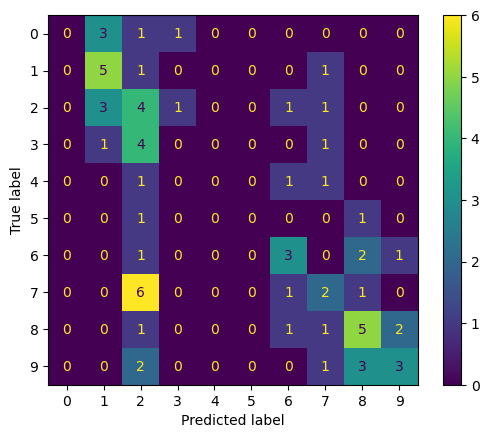

In [20]:
from sklearn import metrics

matrix = metrics.confusion_matrix(y_test, predict)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=matrix)
disp.plot()


In [21]:
print(metrics.classification_report(y_test, predict))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         5
         2.0       0.42      0.71      0.53         7
         3.0       0.18      0.40      0.25        10
         4.0       0.00      0.00      0.00         6
         5.0       0.00      0.00      0.00         3
         6.0       0.00      0.00      0.00         2
         7.0       0.43      0.43      0.43         7
         8.0       0.25      0.20      0.22        10
         9.0       0.42      0.50      0.45        10
        10.0       0.50      0.33      0.40         9

    accuracy                           0.32        69
   macro avg       0.22      0.26      0.23        69
weighted avg       0.27      0.32      0.28        69



/Users/benfogerty/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/benfogerty/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/benfogerty/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
